In [6]:
import torch
import random
import numpy as np
import matplotlib.pyplot as plt

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True
import torchvision.datasets

In [7]:
CIFAR_train = torchvision.datasets.CIFAR10('./', download=True, train=True)
CIFAR_test = torchvision.datasets.CIFAR10('./', download=True, train=False)

100%|███████████████████████████████████████████████████████████████| 170498071/170498071 [00:23<00:00, 7289250.21it/s]


Extracting ./cifar-10-python.tar.gz to ./
Files already downloaded and verified


In [12]:
CIFAR_train.data.shape

(50000, 32, 32, 3)

In [13]:
X_train = torch.FloatTensor(CIFAR_train.data)
y_train = torch.LongTensor(CIFAR_train.targets)
X_test = torch.FloatTensor(CIFAR_test.data)
y_test = torch.LongTensor(CIFAR_test.targets)

In [14]:
len(y_train), len(y_test)

(50000, 10000)

In [15]:
X_train.min(), X_train.max()

(tensor(0.), tensor(255.))

In [16]:
X_train /= 255.
X_test /= 255.

In [17]:
X_train[0,0]

tensor([[0.2314, 0.2431, 0.2471],
        [0.1686, 0.1804, 0.1765],
        [0.1961, 0.1882, 0.1686],
        [0.2667, 0.2118, 0.1647],
        [0.3843, 0.2863, 0.2039],
        [0.4667, 0.3569, 0.2471],
        [0.5451, 0.4196, 0.2941],
        [0.5686, 0.4314, 0.3137],
        [0.5843, 0.4588, 0.3490],
        [0.5843, 0.4706, 0.3647],
        [0.5137, 0.4039, 0.3020],
        [0.4902, 0.3882, 0.2980],
        [0.5569, 0.4510, 0.3569],
        [0.5647, 0.4392, 0.3373],
        [0.5373, 0.4118, 0.3098],
        [0.5059, 0.3804, 0.2784],
        [0.5373, 0.4157, 0.3098],
        [0.5255, 0.4157, 0.2980],
        [0.4863, 0.3804, 0.2510],
        [0.5451, 0.4431, 0.3059],
        [0.5451, 0.4392, 0.2941],
        [0.5216, 0.4118, 0.2706],
        [0.5333, 0.4118, 0.2902],
        [0.5451, 0.4235, 0.3020],
        [0.5961, 0.4706, 0.3490],
        [0.6392, 0.5137, 0.3922],
        [0.6588, 0.5333, 0.4235],
        [0.6235, 0.5059, 0.4000],
        [0.6196, 0.5098, 0.4078],
        [0.619

In [18]:
CIFAR_train.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

tensor(6) tensor(9) tensor(9) tensor(4) tensor(1) tensor(1) tensor(2) tensor(7) tensor(8) tensor(3) 

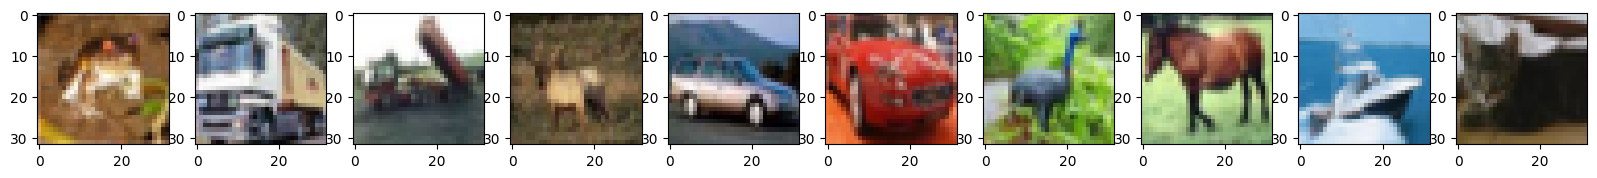

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i])
    print(y_train[i], end=' ')

In [20]:
X_train.shape, y_train.shape

(torch.Size([50000, 32, 32, 3]), torch.Size([50000]))

In [21]:
X_train = X_train.permute(0, 3, 1, 2)
X_test = X_test.permute(0, 3, 1, 2)

In [22]:
X_train[0]

tensor([[[0.2314, 0.1686, 0.1961,  ..., 0.6196, 0.5961, 0.5804],
         [0.0627, 0.0000, 0.0706,  ..., 0.4824, 0.4667, 0.4784],
         [0.0980, 0.0627, 0.1922,  ..., 0.4627, 0.4706, 0.4275],
         ...,
         [0.8157, 0.7882, 0.7765,  ..., 0.6275, 0.2196, 0.2078],
         [0.7059, 0.6784, 0.7294,  ..., 0.7216, 0.3804, 0.3255],
         [0.6941, 0.6588, 0.7020,  ..., 0.8471, 0.5922, 0.4824]],

        [[0.2431, 0.1804, 0.1882,  ..., 0.5176, 0.4902, 0.4863],
         [0.0784, 0.0000, 0.0314,  ..., 0.3451, 0.3255, 0.3412],
         [0.0941, 0.0275, 0.1059,  ..., 0.3294, 0.3294, 0.2863],
         ...,
         [0.6667, 0.6000, 0.6314,  ..., 0.5216, 0.1216, 0.1333],
         [0.5451, 0.4824, 0.5647,  ..., 0.5804, 0.2431, 0.2078],
         [0.5647, 0.5059, 0.5569,  ..., 0.7216, 0.4627, 0.3608]],

        [[0.2471, 0.1765, 0.1686,  ..., 0.4235, 0.4000, 0.4039],
         [0.0784, 0.0000, 0.0000,  ..., 0.2157, 0.1961, 0.2235],
         [0.0824, 0.0000, 0.0314,  ..., 0.1961, 0.1961, 0.

In [23]:
X_train.shape

torch.Size([50000, 3, 32, 32])

In [31]:
class LeNet5(torch.nn.Module):
    def __init__(self,activation='relu',conv_size=5,
               use_batch_norm=False,pooling='max'):
        super(LeNet5,self).__init__()

        self.use_batch_norm = use_batch_norm
        self.conv_size = conv_size

        if activation == 'relu':
            activ = torch.nn.ReLU()
        elif activation == 'tanh':
            activ = torch.nn.Tanh()
        else:
            raise NotImplementedError

        if pooling == 'max':
            pool = torch.nn.MaxPool2d(kernel_size=2,stride=2)
        elif pooling == 'avg':
            pool = torch.nn.AvgPool2d(kernel_size=2,stride=2)
        else:
            raise NotImplementedError

        if conv_size == 5 :
            self.conv1 = torch.nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5,padding=0)
        elif conv_size == 3:
            self.conv1_1 = torch.nn.Conv2d(in_channels=3,out_channels=6,kernel_size=3,padding=0)
            self.conv1_2 = torch.nn.Conv2d(in_channels=6,out_channels=6,kernel_size=3,padding=0)
        else:
            raise NotImplementedError
        self.act1 = activ
        self.bn1 = torch.nn.BatchNorm2d(num_features=6)
        self.pool1 = pool

        if conv_size == 5 :
            self.conv2 = torch.nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5,padding=0)
        elif conv_size == 3:
            self.conv2_1 = torch.nn.Conv2d(in_channels=6,out_channels=16,kernel_size=3,padding=0)
            self.conv2_2 = torch.nn.Conv2d(in_channels=16,out_channels=16,kernel_size=3,padding=0)
        else:
            raise NotImplementedError
        self.act2 = activ
        self.bn2 = torch.nn.BatchNorm2d(num_features=16)
        self.pool2 = pool

        self.fc1 = torch.nn.Linear(5*5*16,120)
        self.act3 = activ
        self.fc2 = torch.nn.Linear(120,84)
        self.act4 = activ
        self.fc3 = torch.nn.Linear(84,10)

    def forward(self,x):
        if self.conv_size == 5:
            x = self.conv1(x)
        elif self.conv_size == 3:
            x = self.conv1_2(self.conv1_1(x))
        x = self.act1(x)
        if self.use_batch_norm:
            x = self.bn1(x)
        x = self.pool1(x)

        if self.conv_size == 5:
            x = self.conv2(x)
        elif self.conv_size == 3:
            x = self.conv2_2(self.conv2_1(x))
        x = self.act2(x)
        if self.use_batch_norm:
            x = self.bn2(x)
        x = self.pool2(x)

        x = x.reshape(x.size(0),x.size(1)*x.size(2)*x.size(3))

        x = self.fc1(x)
        x = self.act3(x)
        x = self.fc2(x)
        x = self.act4(x)
        x = self.fc3(x)

        return(x)

In [72]:
def train(net,X_train,y_train,X_test,y_test):
    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
    net = net.to(device)
    loss = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(net.parameters(),lr=1.0e-3)
    batch_size = 100

    test_accuracy_history = []
    test_loss_history = []

    X_test = X_test.to(device)
    y_test = y_test.to(device)

    for epoch in range(30):
        order = np.random.permutation(len(y_train))
        for start_ind in range(0,len(X_train),batch_size):
            optimizer.zero_grad()
            net.train()
            index = order[start_ind:start_ind+batch_size]

            X_train_batch = X_train[index].to(device)
            y_train_batch = y_train[index].to(device)

            pred = net.forward(X_train_batch)
     
            loss_f = loss(pred,y_train_batch)
           
            loss_f.backward()

            optimizer.step()
        
        net.eval()
        pred_test = net.forward(X_test)
        test_loss_history.append(loss(pred_test,y_test).data.cpu())

        accuracy = (pred_test.argmax(dim=1)==y_test).float().mean().data.cpu()
        test_accuracy_history.append(accuracy)
        print(f'точность {accuracy}')
    
    del net
    return test_accuracy_history, test_loss_history

In [73]:
accuracies = {}
losses = {}

accuracies['tanh'], losses['tanh'] = \
    train(LeNet5(activation='tanh', conv_size=5),
          X_train, y_train, X_test, y_test)
accuracies['relu'], losses['relu'] = \
    train(LeNet5(activation='relu', conv_size=5),
          X_train, y_train, X_test, y_test)
accuracies['relu_3'], losses['relu_3'] = \
    train(LeNet5(activation='relu', conv_size=3),
          X_train, y_train, X_test, y_test)
accuracies['relu_3_max_pool'], losses['relu_3_max_pool'] = \
    train(LeNet5(activation='relu', conv_size=3, pooling='max'), 
          X_train, y_train, X_test, y_test)
accuracies['relu_3_max_pool_bn'], losses['relu_3_max_pool_bn'] = \
    train(LeNet5(activation='relu', conv_size=3, pooling='max', use_batch_norm=True), 
          X_train, y_train, X_test, y_test)

точность 0.4596000015735626
точность 0.5198000073432922
точность 0.5475999712944031
точность 0.5680000185966492
точность 0.5870000123977661
точность 0.5981000065803528
точность 0.5820000171661377
точность 0.616599977016449
точность 0.6187999844551086
точность 0.6236000061035156
точность 0.6197999715805054
точность 0.6338000297546387
точность 0.6262999773025513
точность 0.623199999332428
точность 0.6240000128746033
точность 0.6347000002861023
точность 0.6283000111579895
точность 0.6328999996185303
точность 0.6276999711990356
точность 0.6309000253677368
точность 0.6230999827384949
точность 0.6189000010490417
точность 0.6158000230789185
точность 0.6158999800682068
точность 0.6222000122070312
точность 0.6197999715805054
точность 0.6107000112533569
точность 0.6176000237464905
точность 0.6164000034332275
точность 0.6111999750137329
точность 0.39500001072883606
точность 0.47589999437332153
точность 0.5248000025749207
точность 0.5349000096321106
точность 0.5590999722480774
точность 0.564599990

Text(0.5, 1.0, 'Качество LeNet5')

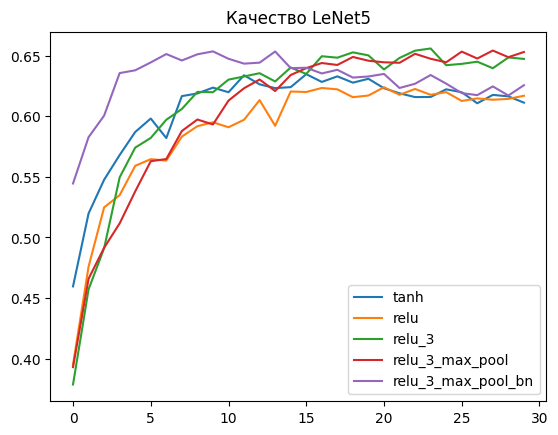

In [74]:
for name in accuracies.keys():
    plt.plot(accuracies[name], label=name)

plt.legend()
plt.title('Качество LeNet5')

Text(0.5, 1.0, 'Loss LeNet5')

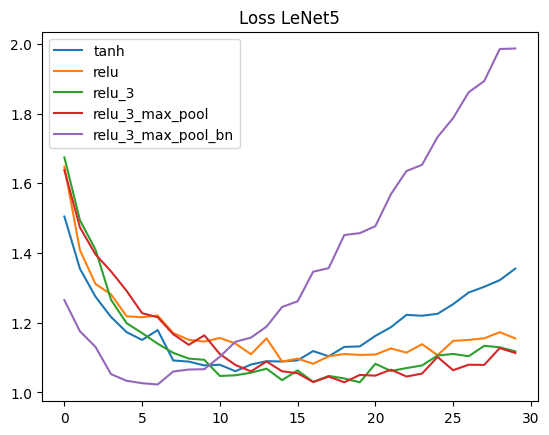

In [75]:
for name in losses.keys():
    plt.plot(losses[name], label=name)

plt.legend()
plt.title('Loss LeNet5')

In [76]:
class CIFARNet(torch.nn.Module):
    def __init__(self):
        super(CIFARNet, self).__init__()
        self.batch_norm0 = torch.nn.BatchNorm2d(3)

        self.conv1 = torch.nn.Conv2d(3, 16, 3, padding=1)
        self.act1  = torch.nn.ReLU()
        self.batch_norm1 = torch.nn.BatchNorm2d(16)
        self.pool1 = torch.nn.MaxPool2d(2, 2)
        
        self.conv2 = torch.nn.Conv2d(16, 32, 3, padding=1)
        self.act2  = torch.nn.ReLU()
        self.batch_norm2 = torch.nn.BatchNorm2d(32)
        self.pool2 = torch.nn.MaxPool2d(2, 2)
        
        self.conv3 = torch.nn.Conv2d(32, 64, 3, padding=1)
        self.act3  = torch.nn.ReLU()
        self.batch_norm3 = torch.nn.BatchNorm2d(64)

        self.fc1   = torch.nn.Linear(8 * 8 * 64, 256)
        self.act4  = torch.nn.Tanh()
        self.batch_norm4 = torch.nn.BatchNorm1d(256)
        
        self.fc2   = torch.nn.Linear(256, 64)
        self.act5  = torch.nn.Tanh()
        self.batch_norm5 = torch.nn.BatchNorm1d(64)
        
        self.fc3   = torch.nn.Linear(64, 10)
    
    def forward(self, x):
        x = self.batch_norm0(x)
        x = self.conv1(x)
        x = self.act1(x)
        x = self.batch_norm1(x)
        x = self.pool1(x)
        
        x = self.conv2(x)
        x = self.act2(x)
        x = self.batch_norm2(x)
        x = self.pool2(x)
        
        x = self.conv3(x)
        x = self.act3(x)
        x = self.batch_norm3(x)
        
        x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))
        x = self.fc1(x)
        x = self.act4(x)
        x = self.batch_norm4(x)
        x = self.fc2(x)
        x = self.act5(x)
        x = self.batch_norm5(x)
        x = self.fc3(x)
        
        return x



In [77]:
accuracies['CIfarnet'], losses['CIfarnet'] = train(CIFARNet(),X_train,y_train,
                                                   X_test,y_test)

точность 0.6534000039100647
точность 0.7034000158309937
точность 0.7080000042915344
точность 0.7190999984741211
точность 0.7235000133514404
точность 0.7236999869346619
точность 0.7177000045776367
точность 0.7120000123977661
точность 0.7163000106811523
точность 0.7114999890327454
точность 0.7106999754905701
точность 0.7103999853134155
точность 0.7121999859809875
точность 0.7111999988555908
точность 0.7096999883651733
точность 0.7178999781608582
точность 0.7089999914169312
точность 0.7117999792098999
точность 0.7150999903678894
точность 0.7235999703407288
точность 0.715499997138977
точность 0.7182999849319458
точность 0.7064999938011169
точность 0.7124000191688538
точность 0.7181000113487244
точность 0.7199000120162964
точность 0.718500018119812
точность 0.7111999988555908
точность 0.7134000062942505
точность 0.7114999890327454


Text(0.5, 1.0, 'Validation Accuracy')

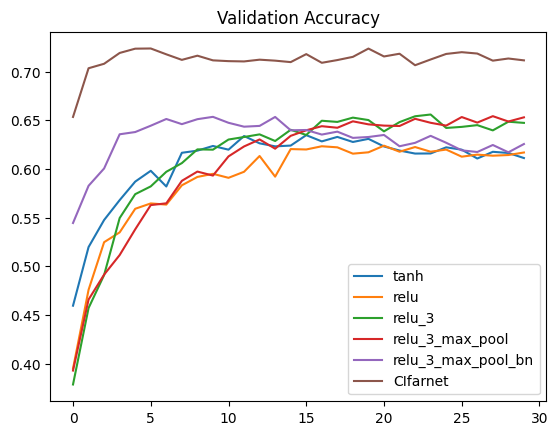

In [78]:
for experiment_id in accuracies.keys():
    plt.plot(accuracies[experiment_id], label=experiment_id)
plt.legend()
plt.title('Validation Accuracy')

Text(0.5, 1.0, 'Validation Loss')

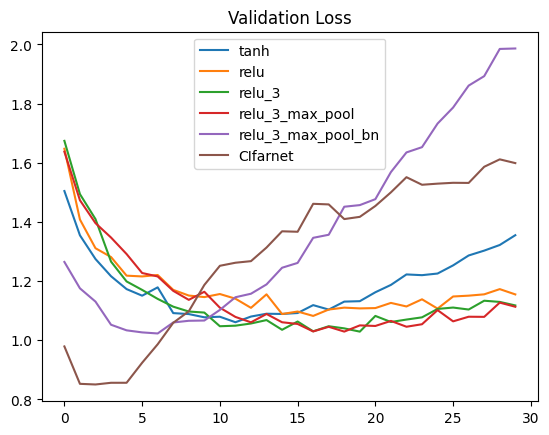

In [79]:
for experiment_id in losses.keys():
    plt.plot(losses[experiment_id], label=experiment_id)
plt.legend()
plt.title('Validation Loss')